#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [46]:
from google.colab import files
upload = files.upload()

Saving imdb_top_10000.txt to imdb_top_10000 (1).txt


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('imdb_top_10000.txt', sep="\t", names =[ 'imdbID','title', 'year','score','votes', 'runtime', 'genres'])
df

imdbID                            title  year  score   votes  \
0     tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479   
1     tt0110912              Pulp Fiction (1994)  1994    9.0  490065   
2     tt0137523                Fight Club (1999)  1999    8.8  458173   
3     tt0133093                The Matrix (1999)  1999    8.7  448114   
4     tt1375666                 Inception (2010)  2010    8.9  385149   
...         ...                              ...   ...    ...     ...   
9995  tt0807721                   Meduzot (2007)  2007    7.0    1357   
9996  tt0339642            Daltry Calhoun (2005)  2005    5.2    1357   
9997  tt0060880    The Quiller Memorandum (1966)  1966    6.5    1356   
9998  tt0152836                      Taal (1999)  1999    6.5    1356   
9999  tt0279977            The Navigators (2001)  2001    6.9    1356   

        runtime                            genres  
0     142 mins.                       Crime|Drama  
1     154 mins.                    Crime|Thriller  
2     139 mins.            Drama|Mystery|Thriller  
3     136 mins.           Action|Adventure|Sci-Fi  
4     148 mins.  Action|Adventure|Sci-Fi|Thriller  
...         ...                               ...  
9995   78 mins.                             Drama  
9996  100 mins.        Comedy|Drama|Music|Romance  
9997  104 mins.            Drama|Mystery|Thriller  
9998  179 mins.                   Musical|Romance  
9999   96 mins.                      Comedy|Drama  

[10000 rows x 7 columns]

In [49]:
df.isna()

imdbID  title   year  score  votes  runtime  genres
0      False  False  False  False  False    False   False
1      False  False  False  False  False    False   False
2      False  False  False  False  False    False   False
3      False  False  False  False  False    False   False
4      False  False  False  False  False    False   False
...      ...    ...    ...    ...    ...      ...     ...
9995   False  False  False  False  False    False   False
9996   False  False  False  False  False    False   False
9997   False  False  False  False  False    False   False
9998   False  False  False  False  False    False   False
9999   False  False  False  False  False    False   False

[10000 rows x 7 columns]

In [50]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [51]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [52]:
df[df.genres.isna() == True]

imdbID             title  year  score  votes   runtime genres
7917  tt0990404  Chop Shop (2007)  2007    7.2   2104  84 mins.    NaN

In [53]:
df.shape

(10000, 7)

In [54]:
df.dropna(inplace = True)
df

imdbID                            title  year  score   votes  \
0     tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479   
1     tt0110912              Pulp Fiction (1994)  1994    9.0  490065   
2     tt0137523                Fight Club (1999)  1999    8.8  458173   
3     tt0133093                The Matrix (1999)  1999    8.7  448114   
4     tt1375666                 Inception (2010)  2010    8.9  385149   
...         ...                              ...   ...    ...     ...   
9995  tt0807721                   Meduzot (2007)  2007    7.0    1357   
9996  tt0339642            Daltry Calhoun (2005)  2005    5.2    1357   
9997  tt0060880    The Quiller Memorandum (1966)  1966    6.5    1356   
9998  tt0152836                      Taal (1999)  1999    6.5    1356   
9999  tt0279977            The Navigators (2001)  2001    6.9    1356   

        runtime                            genres  
0     142 mins.                       Crime|Drama  
1     154 mins.                    Crime|Thriller  
2     139 mins.            Drama|Mystery|Thriller  
3     136 mins.           Action|Adventure|Sci-Fi  
4     148 mins.  Action|Adventure|Sci-Fi|Thriller  
...         ...                               ...  
9995   78 mins.                             Drama  
9996  100 mins.        Comedy|Drama|Music|Romance  
9997  104 mins.            Drama|Mystery|Thriller  
9998  179 mins.                   Musical|Romance  
9999   96 mins.                      Comedy|Drama  

[9999 rows x 7 columns]

In [55]:
df.shape

(9999, 7)

In [56]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

## 2. Asking Questions

Determining the bestt movie using the score of each movie.


## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [57]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [58]:
run_time = [int(r.split(' ')[0]) for r in df.runtime]
df['runtime'] = run_time
df.head()

#df.runtime = df.runtime.astype('int')
#df.dtypes

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [59]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

In [60]:
genre = df.genres[0]
genre

'Crime|Drama'

In [61]:
genre_set=set()
for genre in df.genres:
    list_genre = genre.split("|")
    genre_set.update(list_genre)
len(genre_set)

24

In [62]:
#to add columns
for genre in genre_set:
    df[genre] = [genre in row.split("|") for row in df.genres]
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  Film-Noir  Family  Western  ...  Crime  \
0                       Crime|Drama      False   False    False  ...   True   
1                    Crime|Thriller      False   False    False  ...   True   
2            Drama|Mystery|Thriller      False   False    False  ...  False   
3           Action|Adventure|Sci-Fi      False   False    False  ...  False   
4  Action|Adventure|Sci-Fi|Thriller      False   False    False  ...  False   

   Sci-Fi  Action  Reality-TV  History  Sport   News  Thriller  Animation  \
0   False   False       False    False  False  False     False      False   
1   False   False       False    False  False  False      True      False   
2   False   False       False    False  False  False      True      False   
3    True    True       False    False  False  False     False      False   
4    True    True       False    False  False  False      True      False   

   Biography  
0      False  
1      False  
2      False  
3      False  
4      False  

[5 rows x 31 columns]

In [63]:
df.drop(["genres"],axis=1, inplace=True)

In [64]:
title  = [title[:-7] for title in df.title]
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

   Film-Noir  Family  Western  Music  ...  Crime  Sci-Fi  Action  Reality-TV  \
0      False   False    False  False  ...   True   False   False       False   
1      False   False    False  False  ...   True   False   False       False   
2      False   False    False  False  ...  False   False   False       False   
3      False   False    False  False  ...  False    True    True       False   
4      False   False    False  False  ...  False    True    True       False   

   History  Sport   News  Thriller  Animation  Biography  
0    False  False  False     False      False      False  
1    False  False  False      True      False      False  
2    False  False  False      True      False      False  
3    False  False  False     False      False      False  
4    False  False  False      True      False      False  

[5 rows x 30 columns]

## 4. EDA

In [65]:
df.describe()


year        score          votes      runtime
count  9999.000000  9999.000000    9999.000000  9999.000000
mean   1993.471447     6.385989   16605.462946   103.580358
std      14.830049     1.189965   34564.883945    26.629310
min    1950.000000     1.500000    1356.000000     0.000000
25%    1986.000000     5.700000    2334.500000    93.000000
50%    1998.000000     6.600000    4981.000000   102.000000
75%    2005.000000     7.200000   15278.500000   115.000000
max    2011.000000     9.200000  619479.000000   450.000000

Text(0, 0.5, 'Number of movies')

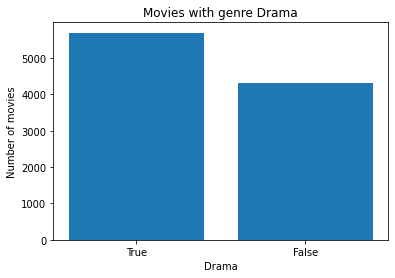

In [66]:
x=['True', 'False']
y=df.Drama.value_counts()
plt.bar(x,y)
plt.title("Movies with genre Drama")
plt.xlabel("Drama")
plt.ylabel("Number of movies")

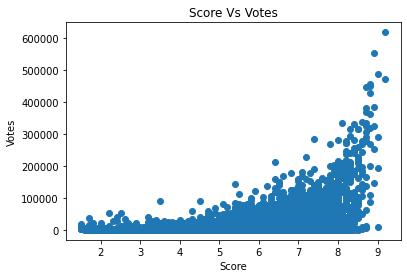

In [67]:
plt.scatter(df.score,df.votes)
plt.title("Score Vs Votes")
plt.xlabel("Score")
plt.ylabel("Votes")
plt.show()

## 5. Determining Best Movies

In [68]:
yeardf = df.groupby('year', sort=False)
yeardf



In [69]:
yeardf.size()

year
1994    235
1999    297
2010    315
2009    417
1993    219
       ... 
1961     43
1951     32
1953     47
1956     46
1955     53
Length: 62, dtype: int64

In [70]:
yeardf.first()

imdbID                            title  score   votes  runtime  \
year                                                                       
1994  tt0111161  The Shawshank Redemption (1994)    9.2  619479      142   
1999  tt0137523                Fight Club (1999)    8.8  458173      139   
2010  tt1375666                 Inception (2010)    8.9  385149      148   
2009  tt0499549                    Avatar (2009)    8.1  336855      162   
1993  tt0108052          Schindler's List (1993)    8.9  325888      195   
...         ...                              ...    ...     ...      ...   
1961  tt0054698    Breakfast at Tiffany's (1961)    7.8   42114      115   
1951  tt0044079      Strangers on a Train (1951)    8.3   40104      101   
1953  tt0046250             Roman Holiday (1953)    8.1   36760      118   
1956  tt0049730             The Searchers (1956)    8.1   32502      119   
1955  tt0048545     Rebel Without a Cause (1955)    7.9   30491      111   

      Film-Noir  Family  Western  Music  Mystery  ...  Crime  Sci-Fi  Action  \
year                                              ...                          
1994      False   False    False  False    False  ...   True   False   False   
1999      False   False    False  False     True  ...  False   False   False   
2010      False   False    False  False    False  ...  False    True    True   
2009      False   False    False  False    False  ...  False    True    True   
1993      False   False    False  False    False  ...  False   False   False   
...         ...     ...      ...    ...      ...  ...    ...     ...     ...   
1961      False   False    False  False    False  ...  False   False   False   
1951       True   False    False  False     True  ...   True   False   False   
1953      False   False    False  False    False  ...  False   False   False   
1956      False   False     True  False    False  ...  False   False   False   
1955      False   False    False  False    False  ...  False   False   False   

      Reality-TV  History  Sport   News  Thriller  Animation  Biography  
year                                                                     
1994       False    False  False  False     False      False      False  
1999       False    False  False  False      True      False      False  
2010       False    False  False  False      True      False      False  
2009       False    False  False  False     False      False      False  
1993       False     True  False  False     False      False       True  
...          ...      ...    ...    ...       ...        ...        ...  
1961       False    False  False  False     False      False      False  
1951       False    False  False  False      True      False      False  
1953       False    False  False  False     False      False      False  
1956       False    False  False  False     False      False      False  
1955       False    False  False  False     False      False      False  

[62 rows x 29 columns]

In [71]:
yeardf.last()

imdbID                        title  score  votes  runtime  \
year                                                                  
1994  tt0110064         House Party 3 (1994)    3.1   1357      100   
1999  tt0152836                  Taal (1999)    6.5   1356      179   
2010  tt1629391        Tere Bin Laden (2010)    7.2   1357       95   
2009  tt1281374             Don McKay (2009)    6.0   1363       87   
1993  tt0110222  Kabhi Haan Kabhi Naa (1993)    7.6   1374      158   
...         ...                          ...    ...    ...      ...   
1961  tt0055320              Il Posto (1961)    8.1   1379       93   
1951  tt0043643     His Kind of Woman (1951)    7.2   1474      120   
1953  tt0046000                  Lili (1953)    7.2   1376       81   
1956  tt0048937   Alexander the Great (1956)    5.9   1363      141   
1955  tt0048198        I Live in Fear (1955)    7.3   1360      103   

      Film-Noir  Family  Western  Music  Mystery  ...  Crime  Sci-Fi  Action  \
year                                              ...                          
1994      False   False    False   True    False  ...  False   False   False   
1999      False   False    False  False    False  ...  False   False   False   
2010      False   False    False  False    False  ...  False   False   False   
2009      False   False    False  False     True  ...  False   False   False   
1993      False   False    False   True    False  ...  False   False   False   
...         ...     ...      ...    ...      ...  ...    ...     ...     ...   
1961      False   False    False  False    False  ...  False   False   False   
1951       True   False    False  False    False  ...   True   False   False   
1953      False   False    False  False    False  ...  False   False   False   
1956      False   False    False  False    False  ...  False   False   False   
1955      False   False    False  False    False  ...  False   False   False   

      Reality-TV  History  Sport   News  Thriller  Animation  Biography  
year                                                                     
1994       False    False  False  False     False      False      False  
1999       False    False  False  False     False      False      False  
2010       False    False  False  False     False      False      False  
2009       False    False  False  False      True      False      False  
1993       False    False  False  False     False      False      False  
...          ...      ...    ...    ...       ...        ...        ...  
1961       False    False  False  False     False      False      False  
1951       False    False  False  False      True      False      False  
1953       False    False  False  False     False      False      False  
1956       False     True  False  False     False      False       True  
1955       False    False  False  False     False      False      False  

[62 rows x 29 columns]

In [72]:
yeardf.groups

{1994: [0, 1, 5, 21, 74, 248, 267, 310, 326, 345, 348, 388, 400, 477, 564, 730, 845, 910, 1016, 1159, 1296, 1373, 1414, 1456, 1467, 1476, 1480, 1610, 1718, 1724, 1758, 1847, 1876, 1881, 1981, 1986, 1999, 2038, 2071, 2072, 2106, 2117, 2190, 2196, 2225, 2284, 2297, 2355, 2404, 2425, 2446, 2461, 2500, 2531, 2586, 2702, 2744, 2762, 2962, 2966, 2994, 3030, 3110, 3136, 3212, 3226, 3252, 3253, 3311, 3385, 3406, 3440, 3473, 3481, 3487, 3538, 3558, 3592, 3598, 3615, 3684, 3708, 3711, 3762, 3778, 3815, 3817, 3909, 3926, 3970, 3999, 4013, 4042, 4043, 4047, 4051, 4104, 4112, 4199, 4227, ...], 1999: [2, 3, 6, 15, 22, 77, 150, 154, 190, 193, 197, 216, 219, 250, 264, 289, 320, 349, 378, 448, 449, 451, 462, 479, 525, 551, 601, 648, 650, 657, 658, 703, 710, 712, 725, 735, 761, 775, 793, 831, 885, 889, 966, 969, 973, 1010, 1011, 1013, 1047, 1055, 1060, 1063, 1153, 1187, 1202, 1207, 1217, 1252, 1255, 1263, 1272, 1281, 1293, 1336, 1343, 1365, 1432, 1455, 1519, 1564, 1582, 1643, 1647, 1651, 1832, 1844, 186

In [73]:
yeardf.get_group(2010).head()

imdbID                  title  year  score   votes  runtime  \
4    tt1375666       Inception (2010)  2010    8.9  385149      148   
100  tt1130884  Shutter Island (2010)  2010    8.0  171493      138   
117  tt0947798      Black Swan (2010)  2010    8.3  150346      108   
122  tt0435761     Toy Story 3 (2010)  2010    8.6  144200      103   
145  tt1250777        Kick-Ass (2010)  2010    8.0  146535      117   

     Film-Noir  Family  Western  Music  ...  Crime  Sci-Fi  Action  \
4        False   False    False  False  ...  False    True    True   
100      False   False    False  False  ...  False   False   False   
117      False   False    False  False  ...  False   False   False   
122      False    True    False  False  ...  False   False   False   
145      False   False    False  False  ...  False   False    True   

     Reality-TV  History  Sport   News  Thriller  Animation  Biography  
4         False    False  False  False      True      False      False  
100       False    False  False  False      True      False      False  
117       False    False  False  False      True      False      False  
122       False    False  False  False     False       True      False  
145       False    False  False  False     False      False      False  

[5 rows x 30 columns]

In [74]:
yeardf.max()

imdbID                                           title  score  \
year                                                                     
1994  tt0145529  Yrrol - En kolossalt genomt\xe4nkt film (1994)    9.2   
1999  tt0289424                                 eXistenZ (1999)    8.8   
2010  tt1740707                                   Zero 2 (2010)    8.9   
2009  tt1569364                                  [Rec] 2 (2009)    8.4   
1993  tt0115819               Wrestling Ernest Hemingway (1993)    8.9   
...         ...                                             ...    ...   
1961  tt0055913                                  Yojimbo (1961)    8.4   
1951  tt0044876                      When Worlds Collide (1951)    8.3   
1953  tt0047677                                   Ugetsu (1953)    8.3   
1956  tt0197521                      Written on the Wind (1956)    8.2   
1955  tt0049674                          We're No Angels (1955)    8.3   

       votes  runtime  Film-Noir  Family  Western  Music  Mystery  ...  Crime  \
year                                                               ...          
1994  619479      450      False    True     True   True     True  ...   True   
1999  458173      189      False    True     True   True     True  ...   True   
2010  385149      179      False    True     True   True     True  ...   True   
2009  336855      170      False    True    False   True     True  ...   True   
1993  325888      261      False    True     True   True     True  ...   True   
...      ...      ...        ...     ...      ...    ...      ...  ...    ...   
1961   42114      186      False    True     True  False     True  ...   True   
1951   40104      171       True    True    False  False     True  ...   True   
1953   36760      136       True    True     True   True     True  ...   True   
1956   32502      220       True    True     True   True     True  ...   True   
1955   30491      181       True    True     True   True     True  ...   True   

      Sci-Fi  Action  Reality-TV  History  Sport   News  Thriller  Animation  \
year                                                                           
1994    True    True       False     True   True  False      True       True   
1999    True    True       False     True   True  False      True       True   
2010    True    True       False     True   True   True      True       True   
2009    True    True       False     True   True  False      True       True   
1993    True    True       False     True   True  False      True       True   
...      ...     ...         ...      ...    ...    ...       ...        ...   
1961    True    True       False     True   True  False      True       True   
1951    True    True       False     True   True  False      True       True   
1953    True    True       False     True  False  False      True       True   
1956    True    True       False     True   True  False      True      False   
1955    True    True       False     True  False  False      True       True   

      Biography  
year             
1994       True  
1999       True  
2010       True  
2009       True  
1993       True  
...         ...  
1961       True  
1951       True  
1953       True  
1956       True  
1955       True  

[62 rows x 29 columns]

In [75]:
yeardf.min()

imdbID                                      title  score  votes  \
year                                                                       
1994  tt0106339                  3 Ninjas Kick Back (1994)    2.0   1357   
1999  tt0118665          10 Things I Hate About You (1999)    2.2   1356   
2010  tt0398286                      'Tamara Drewe' (2010)    2.2   1357   
2009  tt0327597                (500) Days of Summer (2009)    1.5   1363   
1993  tt0103743                        A Bronx Tale (1993)    2.4   1374   
...         ...                                        ...    ...    ...   
1961  tt0054130                 A Raisin in the Sun (1961)    1.7   1379   
1951  tt0042619                   A Christmas Carol (1951)    6.2   1474   
1953  tt0044953      Abbott and Costello Go to Mars (1953)    2.9   1376   
1956  tt0047892            ...And God Created Woman (1956)    3.1   1363   
1955  tt0046889  Abbott and Costello Meet the Mummy (1955)    3.7   1360   

      runtime  Film-Noir  Family  Western  Music  Mystery  ...  Crime  Sci-Fi  \
year                                                       ...                  
1994        0      False   False    False  False    False  ...  False   False   
1999        0      False   False    False  False    False  ...  False   False   
2010        0      False   False    False  False    False  ...  False   False   
2009        0      False   False    False  False    False  ...  False   False   
1993        0      False   False    False  False    False  ...  False   False   
...       ...        ...     ...      ...    ...      ...  ...    ...     ...   
1961        0      False   False    False  False    False  ...  False   False   
1951       69      False   False    False  False    False  ...  False   False   
1953        0      False   False    False  False    False  ...  False   False   
1956        0      False   False    False  False    False  ...  False   False   
1955        0      False   False    False  False    False  ...  False   False   

      Action  Reality-TV  History  Sport   News  Thriller  Animation  \
year                                                                   
1994   False       False    False  False  False     False      False   
1999   False       False    False  False  False     False      False   
2010   False       False    False  False  False     False      False   
2009   False       False    False  False  False     False      False   
1993   False       False    False  False  False     False      False   
...      ...         ...      ...    ...    ...       ...        ...   
1961   False       False    False  False  False     False      False   
1951   False       False    False  False  False     False      False   
1953   False       False    False  False  False     False      False   
1956   False       False    False  False  False     False      False   
1955   False       False    False  False  False     False      False   

      Biography  
year             
1994      False  
1999      False  
2010      False  
2009      False  
1993      False  
...         ...  
1961      False  
1951      False  
1953      False  
1956      False  
1955      False  

[62 rows x 29 columns]

In [76]:
yeardf.mean()

score         votes     runtime  Film-Noir    Family   Western  \
year                                                                      
1994  6.081277  19507.868085  106.689362   0.000000  0.148936  0.029787   
1999  6.306734  24169.387205  106.501684   0.000000  0.057239  0.013468   
2010  6.340635  19286.180952  103.034921   0.000000  0.076190  0.022222   
2009  6.287290  18519.033573  100.158273   0.000000  0.067146  0.000000   
1993  6.173516  14785.292237  107.292237   0.000000  0.123288  0.022831   
...        ...           ...         ...        ...       ...       ...   
1961  7.195349   7551.651163  106.418605   0.000000  0.093023  0.093023   
1951  7.478125   8543.812500  102.750000   0.156250  0.031250  0.000000   
1953  7.106383   6196.127660   94.212766   0.127660  0.042553  0.085106   
1956  7.139130   5904.108696  111.913043   0.130435  0.043478  0.130435   
1955  7.250943   6196.584906  103.264151   0.113208  0.037736  0.056604   

         Music   Mystery   Romance    Horror  ...     Crime    Sci-Fi  \
year                                          ...                       
1994  0.034043  0.089362  0.255319  0.063830  ...  0.174468  0.059574   
1999  0.037037  0.114478  0.279461  0.084175  ...  0.178451  0.070707   
2010  0.015873  0.095238  0.196825  0.114286  ...  0.149206  0.060317   
2009  0.035971  0.122302  0.196643  0.148681  ...  0.196643  0.115108   
1993  0.059361  0.091324  0.283105  0.086758  ...  0.210046  0.068493   
...        ...       ...       ...       ...  ...       ...       ...   
1961  0.000000  0.046512  0.302326  0.093023  ...  0.116279  0.139535   
1951  0.000000  0.062500  0.343750  0.062500  ...  0.156250  0.156250   
1953  0.042553  0.085106  0.361702  0.127660  ...  0.106383  0.148936   
1956  0.021739  0.065217  0.239130  0.086957  ...  0.086957  0.086957   
1955  0.037736  0.113208  0.301887  0.113208  ...  0.188679  0.113208   

        Action  Reality-TV   History     Sport      News  Thriller  Animation  \
year                                                                            
1994  0.212766         0.0  0.034043  0.051064  0.000000  0.229787   0.038298   
1999  0.154882         0.0  0.030303  0.023569  0.000000  0.282828   0.030303   
2010  0.247619         0.0  0.047619  0.015873  0.003175  0.339683   0.038095   
2009  0.201439         0.0  0.031175  0.021583  0.000000  0.376499   0.045564   
1993  0.232877         0.0  0.054795  0.031963  0.000000  0.283105   0.018265   
...        ...         ...       ...       ...       ...       ...        ...   
1961  0.093023         0.0  0.023256  0.046512  0.000000  0.093023   0.023256   
1951  0.093750         0.0  0.062500  0.031250  0.000000  0.093750   0.031250   
1953  0.085106         0.0  0.021277  0.000000  0.000000  0.212766   0.021277   
1956  0.108696         0.0  0.152174  0.043478  0.000000  0.130435   0.000000   
1955  0.056604         0.0  0.094340  0.000000  0.000000  0.226415   0.018868   

      Biography  
year             
1994   0.055319  
1999   0.033670  
2010   0.041270  
2009   0.047962  
1993   0.050228  
...         ...  
1961   0.069767  
1951   0.031250  
1953   0.021277  
1956   0.108696  
1955   0.094340  

[62 rows x 27 columns]

In [77]:
 #applying methods to particular rows
yeardf['score'].mean()

year
1994    6.081277
1999    6.306734
2010    6.340635
2009    6.287290
1993    6.173516
          ...   
1961    7.195349
1951    7.478125
1953    7.106383
1956    7.139130
1955    7.250943
Name: score, Length: 62, dtype: float64

In [78]:
for key, valuedf in yeardf:
    result = valuedf[valuedf['score'] == valuedf.score.max()]
    print(result.title, result.year, result.score)

0    The Shawshank Redemption (1994)
Name: title, dtype: object 0    1994
Name: year, dtype: int64 0    9.2
Name: score, dtype: float64
2    Fight Club (1999)
Name: title, dtype: object 2    1999
Name: year, dtype: int64 2    8.8
Name: score, dtype: float64
4    Inception (2010)
Name: title, dtype: object 4    2010
Name: year, dtype: int64 4    8.9
Name: score, dtype: float64
23    Inglourious Basterds (2009)
Name: title, dtype: object 23    2009
Name: year, dtype: int64 23    8.4
Name: score, dtype: float64
8    Schindler's List (1993)
Name: title, dtype: object 8    1993
Name: year, dtype: int64 8    8.9
Name: score, dtype: float64
9    Star Wars: Episode V - The Empire Strikes Back...
Name: title, dtype: object 9    1980
Name: year, dtype: int64 9    8.8
Name: score, dtype: float64
2678    My Father and My Son (2005)
Name: title, dtype: object 2678    2005
Name: year, dtype: int64 2678    8.7
Name: score, dtype: float64
11    The Usual Suspects (1995)
31                 Se7en (1995)

In [79]:
df[df.score == df.score.max()][['title', 'year', 'score']]

title  year  score
0   The Shawshank Redemption (1994)  1994    9.2
26             The Godfather (1972)  1972    9.2

## 6. Trends in Popularity of Genres

In [80]:
genredf = df[list(genre_set)]
genredf.shape

(9999, 24)

In [81]:
genredf.sum()

Film-Noir       40
Family         754
Western        235
Music          371
Mystery       1009
Romance       2441
Horror        1215
Comedy        3922
Fantasy        916
War            512
Musical        260
Adventure     1313
Adult            9
Drama         5697
Crime         1867
Sci-Fi         897
Action        1891
Reality-TV       1
History        358
Sport          288
News             1
Thriller      2832
Animation      314
Biography      394
dtype: int64

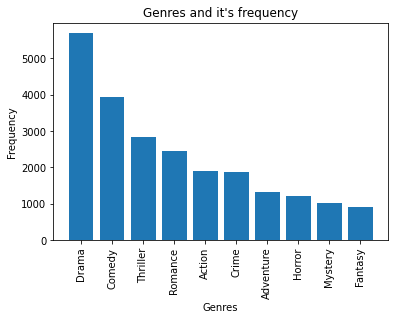

In [82]:
result = genredf.sum()
result = result.sort_values(ascending=False)

x = result.index[:10]
y = result[:10]
plt.bar(x,y)
plt.title("Genres and it's frequency")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()